# Seattle Terry Stops Analysis
In this dataset, we'll analyse Seattle's Terry Stops.

This data represents records of police reported stops under Terry v. Ohio, 392 U.S. 1 (1968). Each row represents a unique stop. 

- Each record contains perceived demographics of the subject, as reported by the officer making the stop and officer demographics as reported to the Seattle Police Department, for employment purposes. 

- Where available, data elements from the associated Computer Aided Dispatch (CAD) event (e.g. Call Type, Initial Call Type, Final Call Type) are included.

This dataset contains the following data:
- Subject Age Group: Subject Age Group (10 year increments) as reported by the officer.
- Subject ID: Key, generated daily, identifying unique subjects in the dataset using a character to character match of first name and last name. "Null" values indicate an "anonymous" or "unidentified" subject. Subjects of a Terry Stop are not required to present identification.
- GO / SC Num: General Offense or Street Check number, relating the Terry Stop to the parent report. This field may have a one to many relationship in the data.  
- Terry Stop ID: Key identifying unique Terry Stop reports.
- Stop Resolution: Resolution of the stop as reported by the officer.
- Weapon Type: Type of weapon, if any, identified during a search or frisk of the subject. Indicates "None" if no weapons was found.
- Officer ID: Key identifying unique officers in the dataset.
- Officer YOB: Year of birth, as reported by the officer.
- Officer Gender: Gender of the officer, as reported by the officer.
- Officer Race: Race of the officer, as reported by the officer.
- Subject Perceived Race: Perceived race of the subject, as reported by the officer.
- Subject Perceived Gender: Perceived gender of the subject, as reported by the officer.
- Reported Date: Date the report was filed in the Records Management System (RMS). Not necessarily the date the stop occurred but generally within 1 day.
- Reported Time: Time the stop was reported in the Records Management System (RMS). Not the time the stop occurred but generally within 10 hours.
- Initial Call Type: Initial classification of the call as assigned by 911.
- Final Call Type: Final classification of the call as assigned by the primary officer closing the event.
- Call Type: How the call was received by the communication center.
- Officer Squad: Functional squad assignment (not budget) of the officer as reported by the Data Analytics Platform (DAP).
- Arrest Flag: Indicator of whether a "physical arrest" was made, of the subject, during the Terry Stop. Does not necessarily reflect a report of an arrest in the Records Management System (RMS).
- Frisk Flag: Indicator of whether a "frisk" was conducted, by the officer, of the subject, during the Terry Stop.
- Precinct: Precinct of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.
- Sector: Sector of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.
- Beat: Beat of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.

Please bear in mind that not all the data was used, so there are some columns that were not used for this visualization.

# Summary
* [1. Data Cleaning](#1.-Initial-Data-Cleaning)
* [2. Analysis](#2.-Analysis)
    * [2.1. Age Comparison](#2.1.-Age-comparison)
    * [2.2. Stop Resolution Comparison](#2.2.-Stop-Resolution-Comparison)
    * [2.3. Stops bt Officer](#2.3.-Stops-by-officer)
    * [2.4. Weapons by the first 10 Officers](#2.4.-Weapons-by-the-first-10-Officers)
    * [2.5. The Top 5 Weapon Types of our Entire Dataframe](#2.5.-The-Top-5-Weapon-Types-of-our-Entire-Dataframe)
    * [2.6. Weapons by Race](#2.6.-Weapons-by-Race)
        * [2.6.1. Multi-Racial People Guns](#2.6.1.-Multi-Racial-People-Guns)
        * [2.6.2. Black People Guns](#2.6.2.-Black-People-Guns)
        * [2.6.3. White People Guns](#2.6.3.-White-People-Guns)
        * [2.6.4. American Indian / Alaskan Native People Guns](#2.6.4.-American-Indian-/-Alaskan-Native-People-Guns)
        * [2.6.5. Asias People Guns](#2.6.5.-Asias-People-Guns)
        * [2.6.6. Hispanic People Guns](#2.6.6.-Hispanic-People-Guns)
        * [2.6.7. Other People Guns](#2.6.7.-Other-People-Guns)
    * [2.7. What Officer Gender is the most usual?](#2.7.-What-Officer-Gender-is-the-most-usual?)
        * [2.7.1. Is there a relationship between Officer Gender and Weapons found?](#2.7.1.-Is-there-a-relationship-between-Officer-Gender-and-Weapons-found?)
        * [2.7.2. Is there a relationship between Officer Gender and Stop Resolution?](#2.7.2.-Is-there-a-relationship-between-Officer-Gender-and-Stop-Resolution?)
    * [2.8. What is the reprentation of the first 5 squads?](#2.8.-What-is-the-reprentation-of-the-first-5-squads?)
        * [2.8.1. Stop occurrences by Officer Squad](#2.8.1.-Stop-occurrences-by-Officer-Squad)
        * [2.8.2. Percentage of Stops by Seattle Precinct](#2.8.2.-Percentage-of-Stops-by-Seattle-Precinct)
        * [2.8.3. Occurences by Sector](#2.8.3.-Occurences-by-Sector)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10,10)

In [4]:
df = pd.read_csv('terry-stops.csv')

In [5]:
df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,36 - 45,NaN,20150000088359,10012,-,None,1735,1977.0,M,White,...,09:58:00.0000000,WARRANT - FELONY PICKUP,--WARRANT SERVICES - FELONY,ONVIEW,NaN,N,N,East,E,E2
1,26 - 35,NaN,20150000087858,10068,GO Report,None,1561,1984.0,M,White,...,19:08:00.0000000,THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING),--DISTURBANCE - OTHER,911,NaN,N,N,East,G,G3
2,18 - 25,NaN,20150000001461,10103,Street Check,None,1539,1973.0,M,White,...,01:32:00.0000000,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN
3,18 - 25,NaN,20150000001461,10104,Street Check,None,1539,1973.0,M,White,...,01:35:00.0000000,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN
4,26 - 35,NaN,20150000103696,10207,Street Check,None,1539,1973.0,M,White,...,21:08:00.0000000,PROPERTY - DAMAGE,--PROPERTY DEST (DAMG),911,NaN,N,N,East,E,E2


# 1. Initial Data Cleaning
Data cleaning is the name of the process that we manage to see what kind of data we should have or not on our dataframe. When we are working with datasets, it's important to clean the data we have to make our analysis more meaningful.
We'll follow the following steps:
* Check if we have null values or nonsense values and drop it
* Remove columns that are not necessary for our analysis
* Rename columns names

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26042 entries, 0 to 26041
Data columns (total 23 columns):
Subject Age Group           26042 non-null object
Subject ID                  25150 non-null float64
GO / SC Num                 26042 non-null int64
Terry Stop ID               26042 non-null int64
Stop Resolution             26042 non-null object
Weapon Type                 26042 non-null object
Officer ID                  26042 non-null int64
Officer YOB                 26025 non-null float64
Officer Gender              26042 non-null object
Officer Race                26042 non-null object
Subject Perceived Race      26042 non-null object
Subject Perceived Gender    26042 non-null object
Reported Date               26042 non-null object
Reported Time               26042 non-null object
Initial Call Type           16188 non-null object
Final Call Type             16188 non-null object
Call Type                   16188 non-null object
Officer Squad               25635 non-null

In [7]:
df.isnull().any()

Subject Age Group           False
Subject ID                   True
GO / SC Num                 False
Terry Stop ID               False
Stop Resolution             False
Weapon Type                 False
Officer ID                  False
Officer YOB                  True
Officer Gender              False
Officer Race                False
Subject Perceived Race      False
Subject Perceived Gender    False
Reported Date               False
Reported Time               False
Initial Call Type            True
Final Call Type              True
Call Type                    True
Officer Squad                True
Arrest Flag                 False
Frisk Flag                  False
Precinct                     True
Sector                       True
Beat                         True
dtype: bool

As we can see, we have many columns that contains null values. Let's drop it.

In [8]:
df = df.dropna()
df.isnull().any()

Subject Age Group           False
Subject ID                  False
GO / SC Num                 False
Terry Stop ID               False
Stop Resolution             False
Weapon Type                 False
Officer ID                  False
Officer YOB                 False
Officer Gender              False
Officer Race                False
Subject Perceived Race      False
Subject Perceived Gender    False
Reported Date               False
Reported Time               False
Initial Call Type           False
Final Call Type             False
Call Type                   False
Officer Squad               False
Arrest Flag                 False
Frisk Flag                  False
Precinct                    False
Sector                      False
Beat                        False
dtype: bool

As we can see now, all the lines have no null value. We'll keep cleaning the data, but in a next moment.
Now, let's rename our columns.

In [9]:
df.columns

Index(['Subject Age Group', 'Subject ID', 'GO / SC Num', 'Terry Stop ID',
       'Stop Resolution', 'Weapon Type', 'Officer ID', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Reported Date', 'Reported Time',
       'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad',
       'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat'],
      dtype='object')

In [10]:
df.columns = ['Subject_Age_Group', 'Subject_ID', 'GO_SC_Num', 'Terry_Stop_ID',
       'Stop_Resolution', 'Weapon_Type', 'Officer_ID', 'Officer_YOB',
       'Officer_Gender', 'Officer_Race', 'Subject_Perceived_Race',
       'Subject_Perceived_Gender', 'Reported_Date', 'Reported_Time',
       'Initial_Call_Type', 'Final_Call_Type', 'Call_Type', 'Officer_Squad',
       'Arrest_Flag', 'Frisk_Flag', 'Precinct', 'Sector', 'Beat']
df.columns

Index(['Subject_Age_Group', 'Subject_ID', 'GO_SC_Num', 'Terry_Stop_ID',
       'Stop_Resolution', 'Weapon_Type', 'Officer_ID', 'Officer_YOB',
       'Officer_Gender', 'Officer_Race', 'Subject_Perceived_Race',
       'Subject_Perceived_Gender', 'Reported_Date', 'Reported_Time',
       'Initial_Call_Type', 'Final_Call_Type', 'Call_Type', 'Officer_Squad',
       'Arrest_Flag', 'Frisk_Flag', 'Precinct', 'Sector', 'Beat'],
      dtype='object')

Nice! The columns are renamed. Now, let's delete the columns that are not necessary for us.

In [11]:
df[:20]

,Subject_Age_Group,Subject_ID,GO_SC_Num,Terry_Stop_ID,Stop_Resolution,Weapon_Type,Officer_ID,Officer_YOB,Officer_Gender,Officer_Race,...,Reported_Time,Initial_Call_Type,Final_Call_Type,Call_Type,Officer_Squad,Arrest_Flag,Frisk_Flag,Precinct,Sector,Beat
894,46 - 55,6.0,20180000097451,39041,GO Report,None,653,1961.0,M,White,...,21:49:00.0000000,ROBBERY - IP/JO (INCLUDES STRONG ARM),ROBBERY (INCLUDES STRONG ARM),911,NORTH PCT 2ND WATCH - B/N RELIEF,N,Y,North,N,N3
895,46 - 55,13.0,20180000173186,40227,Arrest with GO or Supplemental,None,1701,1978.0,M,White,...,07:53:00.0000000,ASLT - WITH OR W/O WEAPONS (NO SHOOTINGS),"--ASSAULTS, OTHER","TELEPHONE OTHER, NOT 911",EAST PCT 1ST W - GEORGE (CHARLIE),Y,N,East,G,G1
899,18 - 25,17.0,20150000384509,15897,Arrest with GO or Supplemental,None,1804,1987.0,M,White,...,02:37:00.0000000,PROPERTY - DAMAGE,--PROPERTY DEST (DAMG) - GRAFFITI (INCLUDES GANG),"TELEPHONE OTHER, NOT 911",EAST PCT 3RD W - GEORGE,Y,Y,East,G,G1
901,36 - 45,19.0,20150000397582,16150,Arrest with GO or Supplemental,None,1765,1980.0,M,White,...,01:44:00.0000000,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),"--ASSAULTS, OTHER",911,WEST PCT 3RD W - D/M RELIEF,Y,N,West,M,M1
902,26 - 35,21.0,20150000337890,14843,GO Report,None,1812,1991.0,M,White,...,01:37:00.0000000,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE,ONVIEW,EAST PCT 3RD W - EDWARD,N,Y,East,E,E1
904,1 - 17,23.0,20170000425208,33261,GO for Prosecutorial Referral,None,1827,1991.0,M,White,...,17:43:00.0000000,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--THEFT - ALL OTHER,"TELEPHONE OTHER, NOT 911",EAST PCT 2ND W - BEATS,N,N,East,E,E1
905,26 - 35,24.0,20160000048068,18362,Arrest with GO or Supplemental,None,457,1962.0,M,White,...,15:55:00.0000000,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--MISC MISD AND VIOLS - RECKLESS ENDANGERMENT,ONVIEW,WEST PCT 2ND W - DAVID BEATS,Y,N,West,M,M3
907,18 - 25,26.0,20150000187319,11280,GO Report,None,963,1969.0,M,White,...,18:56:00.0000000,ROBBERY - IP/JO (INCLUDES STRONG ARM),--ROBBERY - ARMED,911,NORTH PCT 2ND W - LINCOLN,N,Y,North,L,L2
908,18 - 25,26.0,20150000248379,12867,GO for Prosecutorial Referral,None,1816,1983.0,M,White,...,06:21:00.0000000,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),--DISTURBANCE - FIGHT,911,NORTH PCT 3RD W - BOY,N,N,North,N,N2
909,18 - 25,26.0,20150000187319,17161,GO Report,None,963,1969.0,M,White,...,11:34:00.0000000,ROBBERY - IP/JO (INCLUDES STRONG ARM),--ROBBERY - ARMED,911,NORTH PCT 2ND W - LINCOLN,N,Y,North,L,L2


In [12]:
del df['Subject_ID']
del df['GO_SC_Num']

# 2. Analysis
## 2.1. Age comparison
In the first comparison, we will understand how old are the people that are being stopped and how many people from each category.

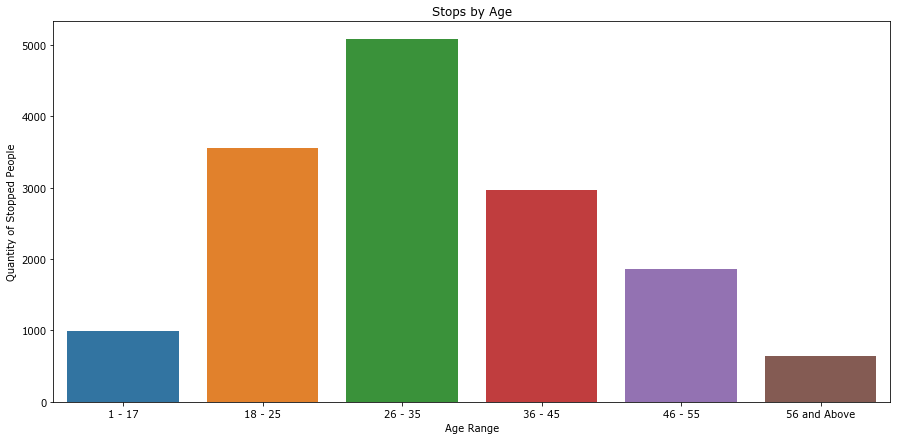

In [13]:
filter_age = df['Subject_Age_Group'] != '-'
df_filter_age = df[filter_age]
x = df_filter_age['Subject_Age_Group'].value_counts().index
y = df_filter_age['Subject_Age_Group'].value_counts()

fig, ax = plt.subplots()
fig.set_size_inches(15, 7)

graph_age = sns.barplot(x=x, 
            y=y, 
            order=['1 - 17', '18 - 25', '26 - 35', '36 - 45', '46 - 55', '56 and Above'] )
graph_age.set(ylabel = 'Quantity of Stopped People', 
                          xlabel = 'Age Range', 
                          title = 'Stops by Age')
plt.show()

## 2.2. Stop Resolution Comparison

In [14]:
df.Stop_Resolution.unique()

array(['GO Report', 'Arrest with GO or Supplemental',
       'GO for Prosecutorial Referral', 'Citation / Infraction',
       'Street Check', '-'], dtype=object)

In [15]:
# filter_stop_resolution = df['Stop_Resolution'] != '-'
# df_filter_stop_resolution = df[filter_stop_resolution]
# x_df_filter_stop_resolution = df_filter_stop_resolution['Stop_Resolution'].value_counts().index
# y_df_filter_stop_resolution = df_filter_stop_resolution['Stop_Resolution'].value_counts()

# fig, ax = plt.subplots()
# fig.set_size_inches(15, 7)
# graph_stop_resolution = sns.barplot(x=x_df_filter_stop_resolution, y=y_df_filter_stop_resolution)
# graph_stop_resolution.set(ylabel = 'Number of Stops', 
#                           xlabel = 'Resolution Type', 
#                           title = 'Seattle Terry Stops Resolution',)
# plt.show()

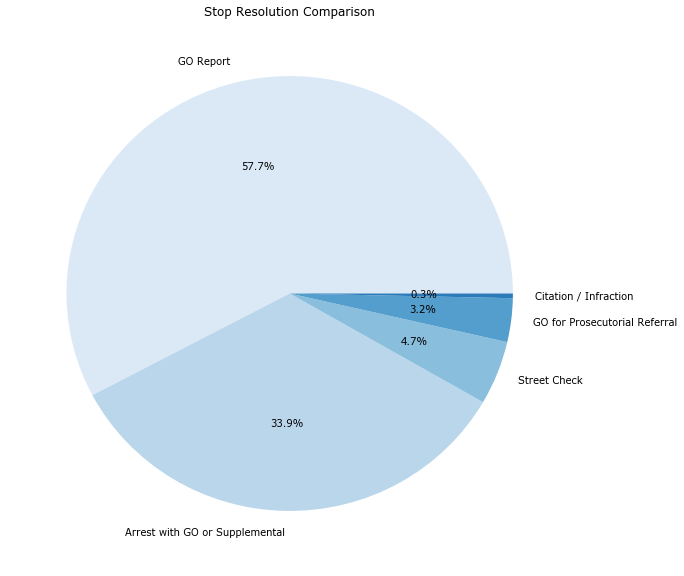

In [85]:
# I didn't remove the string value '-' (hifen) but for this analysis, I've suppressed it with this filter
filter_stop_resolution = df['Stop_Resolution'] != '-'
# Here I'm applying our dataframe using the filter to another variable, that will be a new dataframe
df_filter_stop_resolution = df[filter_stop_resolution]
# Here you can see that I'm retrieving the indexes of the Stop_Resolution column
y_df_filter_stop_resolution = df_filter_stop_resolution['Stop_Resolution'].value_counts().index
# Here we have the values for each Stop_Resolution
x_df_filter_stop_resolution = df_filter_stop_resolution['Stop_Resolution'].value_counts()

# Now, let's create a pie chart because I think it's easier for us to understand what is happening
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
graph_stop_resolution = ax.pie(x=x_df_filter_stop_resolution, 
                               labels=y_df_filter_stop_resolution,
                               autopct='%1.1f%%')

ax.set_title('Stop Resolution Comparison')

plt.show()

## 2.3. Stops by officer
Now, let's see what are the first 10 officers that stopped more people.

In [17]:
len(df['Officer_ID'].unique()), len(df['Officer_ID'])

(901, 15533)

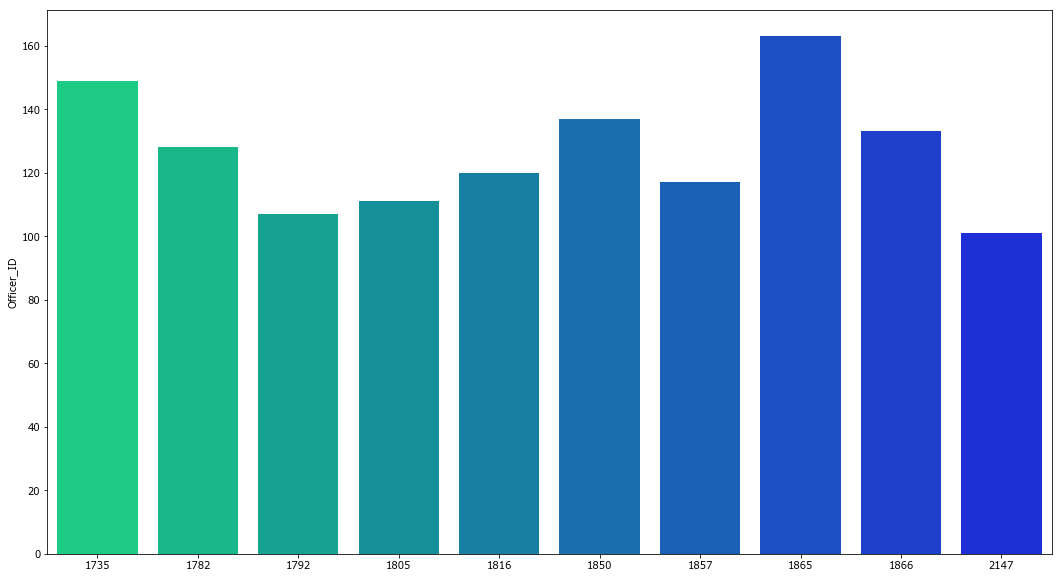

In [18]:
officer_counts = df['Officer_ID'].value_counts()
df_officer_counts = pd.DataFrame(officer_counts)

df_officer_counts_slice = df_officer_counts[:10]

x_counts = df_officer_counts_slice['Officer_ID'].index
y_counts = df_officer_counts_slice['Officer_ID']

fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
graph_officer_counts_ten = sns.barplot(x=x_counts, y=y_counts, data=df_officer_counts_slice, palette='winter_r')

## 2.4. Weapons by the first 10 Officers
Now, from the officers we saw above, we'll see what are the weapons that they find.

In [19]:
officers_ids = officer_counts[:10].index
officers_ids

Int64Index([1865, 1735, 1850, 1866, 1782, 1816, 1857, 1805, 1792, 2147], dtype='int64')

In [20]:
df_officer_ids_weapons = df.loc[df['Officer_ID'].isin(officers_ids)]
df_officer_ids_weapons.head()

,Subject_Age_Group,Terry_Stop_ID,Stop_Resolution,Weapon_Type,Officer_ID,Officer_YOB,Officer_Gender,Officer_Race,Subject_Perceived_Race,Subject_Perceived_Gender,...,Reported_Time,Initial_Call_Type,Final_Call_Type,Call_Type,Officer_Squad,Arrest_Flag,Frisk_Flag,Precinct,Sector,Beat
908,18 - 25,12867,GO for Prosecutorial Referral,None,1816,1983.0,M,White,Black,Male,...,06:21:00.0000000,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),--DISTURBANCE - FIGHT,911,NORTH PCT 3RD W - BOY,N,N,North,N,N2
915,26 - 35,30441,Arrest with GO or Supplemental,None,2147,1985.0,M,White,Black,Male,...,19:00:00.0000000,SHOPLIFT - THEFT,--THEFT - SHOPLIFT,911,SOUTHWEST PCT 2ND W - FRANK,Y,N,Southwest,F,F1
923,1 - 17,35066,GO Report,None,1816,1983.0,M,White,White,Female,...,05:21:00.0000000,"NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)",--BURGLARY - NON RESIDENTIAL/COMMERCIAL,911,WEST PCT 3RD W - QUEEN,N,N,West,Q,Q1
975,26 - 35,26262,Arrest with GO or Supplemental,None,1735,1977.0,M,White,Black,Male,...,16:47:00.0000000,ROBBERY - IP/JO (INCLUDES STRONG ARM),--ROBBERY - ARMED,911,WEST PCT 1ST W - DAVID/MARY,Y,N,West,K,K3
977,26 - 35,23062,Arrest with GO or Supplemental,None,1792,1990.0,M,White,Black,Male,...,01:34:00.0000000,AUTO RECOVERY,--AUTOMOBILES - AUTO THEFT & RECOVERY,ONVIEW,SOUTH PCT 2ND W - ROBERT,Y,Y,South,R,R3


In [21]:
filter_officer_ids_weapons = (df_officer_ids_weapons['Weapon_Type'] != '-') & (df_officer_ids_weapons['Weapon_Type'] != 'None')
filter_officer_ids_weapons.any()

True

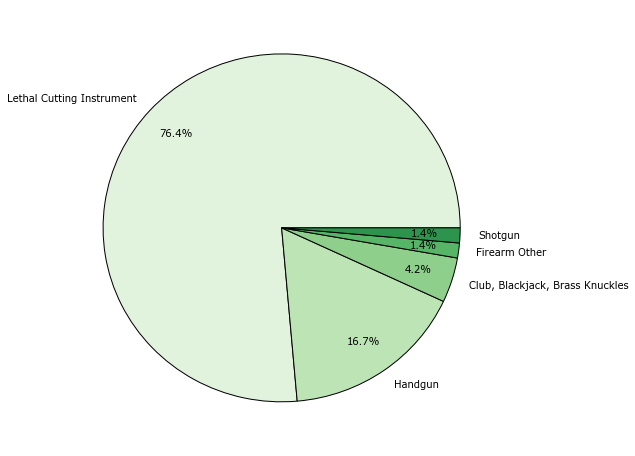

In [22]:
df_officer_ids_weapons_filtered = df_officer_ids_weapons[filter_officer_ids_weapons]

sns.set_palette('Greens')
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

x_weapons = df_officer_ids_weapons_filtered['Weapon_Type'].value_counts()
y_weapons = df_officer_ids_weapons_filtered['Weapon_Type'].value_counts().index

graph_weapons_officers = ax.pie(x=x_weapons,
                                labels=y_weapons, 
                                autopct='%1.1f%%',
                                pctdistance=0.8)

for weapon in graph_weapons_officers[0]:
    weapon.set_edgecolor('black')
plt.show()

## 2.5. The Top 5 Weapon Types of our Entire Dataframe
Above we saw the weapons that our first 10 officers found. Now, let's see what are the weapons for all our dataframe.

In [23]:
filter_total_weapons = (df['Weapon_Type'] != '-') & (df['Weapon_Type'] != 'None')
filter_total_weapons.any()

True

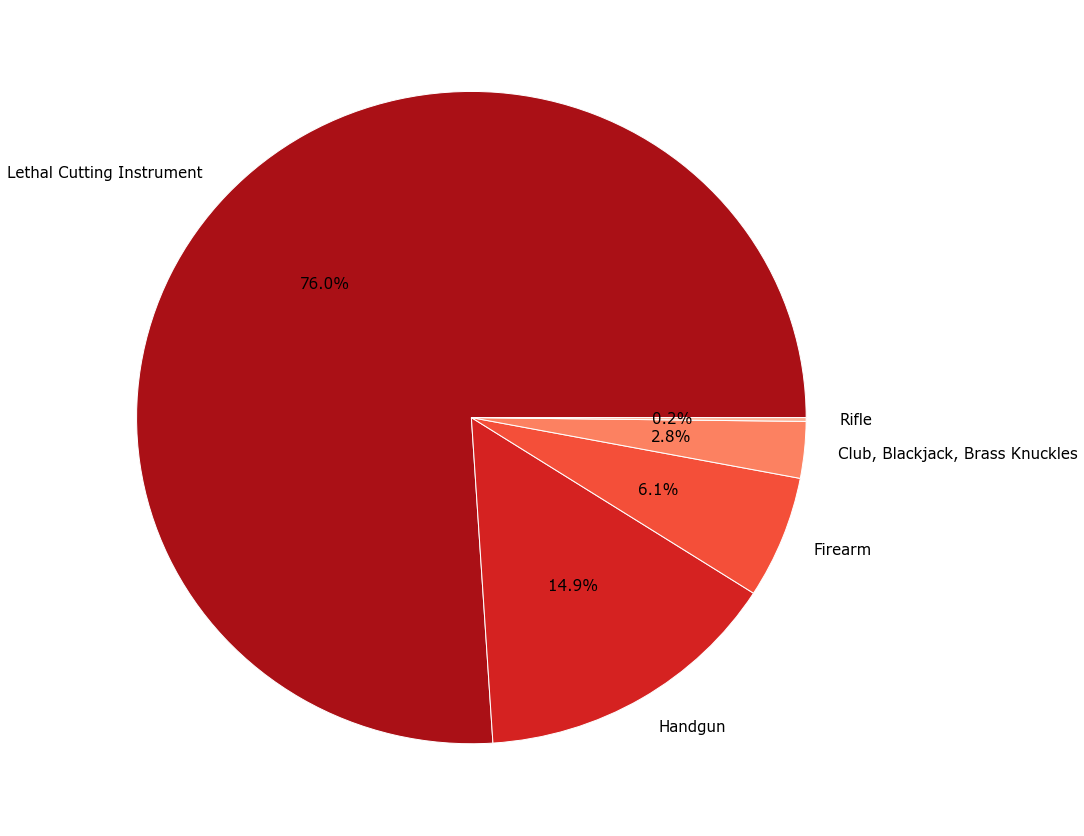

In [24]:
df_total_weapons = df[filter_total_weapons]

# Before we go ahead, I'll fix some Weapon Types to make it easier for us.
df_total_weapons = df_total_weapons.replace({'Blackjack':'Club, Blackjack, Brass Knuckles', 
                                             'Brass Knuckle':'Club, Blackjack, Brass Knuckles',
                                             'Club':'Club, Blackjack, Brass Knuckles',
                                             'Firearm Other':'Firearm', 'Firearm (unk type)':'Firearm'})

max_weapon_on_chart = 5
#chart config
sns.set_palette('Reds_r')
fig, ax = plt.subplots()
fig.set_size_inches(15,15)

x_total_weapons = df_total_weapons['Weapon_Type'].value_counts()[:max_weapon_on_chart]
y_total_weapons = df_total_weapons['Weapon_Type'].value_counts().index[:max_weapon_on_chart]

graph_total_weapons = ax.pie(x=x_total_weapons, labels=y_total_weapons, autopct='%1.1f%%', textprops={'fontsize': 15})

for weapon in graph_total_weapons[0]:
    weapon.set_edgecolor('white')

As a result, we could see that Seattle Officers' findings are mainly Lethal Cutting Instruments - approximately 3/4.

## 2.6. Weapons by Race
Let's see if we can found a pattern of guns by race

In [25]:
filter_weapons = (df['Weapon_Type'] != '-') & (df['Weapon_Type'] != 'None') 
filter_race = (df.Subject_Perceived_Race != 'Unknown') & (df.Subject_Perceived_Race != '-')

df[filter_weapons & filter_race].Subject_Perceived_Race.unique()

array(['Multi-Racial', 'Black', 'White',
       'American Indian / Alaskan Native', 'Asian', 'Hispanic', 'Other'],
      dtype=object)

In [26]:
df_weapons_race = df[filter_weapons & filter_race]

df_weapons_race.Subject_Perceived_Race.unique()

array(['Multi-Racial', 'Black', 'White',
       'American Indian / Alaskan Native', 'Asian', 'Hispanic', 'Other'],
      dtype=object)

In [27]:
filter_Multi_Racial = df_weapons_race.Subject_Perceived_Race == 'Multi-Racial'
filter_Black = df_weapons_race.Subject_Perceived_Race == 'Black'
filter_White = df_weapons_race.Subject_Perceived_Race == 'White'
filter_AIAN = df_weapons_race.Subject_Perceived_Race == 'American Indian / Alaskan Native'
filter_Asian = df_weapons_race.Subject_Perceived_Race == 'Asian'
filter_Hispanic = df_weapons_race.Subject_Perceived_Race == 'Hispanic'
filter_Other = df_weapons_race.Subject_Perceived_Race == 'Other'

### 2.6.1. Multi-Racial People Guns

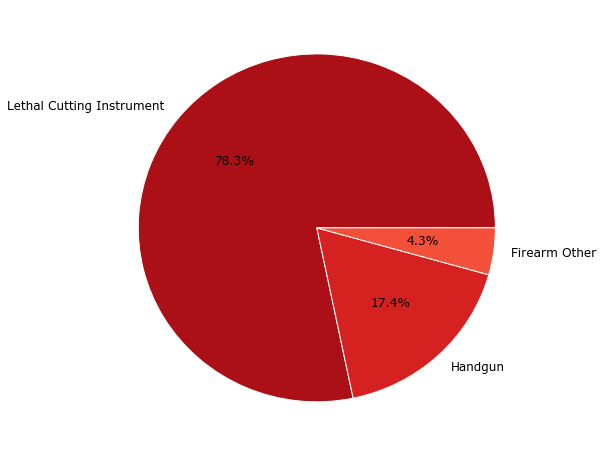

In [28]:
max_weapon_on_chart = 5
#chart config
sns.set_palette('Reds_r')
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

x_total_weapons = df_weapons_race[filter_Multi_Racial].Weapon_Type.value_counts()[:max_weapon_on_chart]
y_total_weapons = df_weapons_race[filter_Multi_Racial].Weapon_Type.value_counts().index[:max_weapon_on_chart]

graph_total_weapons = ax.pie(x=x_total_weapons, labels=y_total_weapons, autopct='%1.1f%%', textprops={'fontsize': 12})

for weapon in graph_total_weapons[0]:
    weapon.set_edgecolor('white')
    
plt.show()

### 2.6.2. Black People Guns

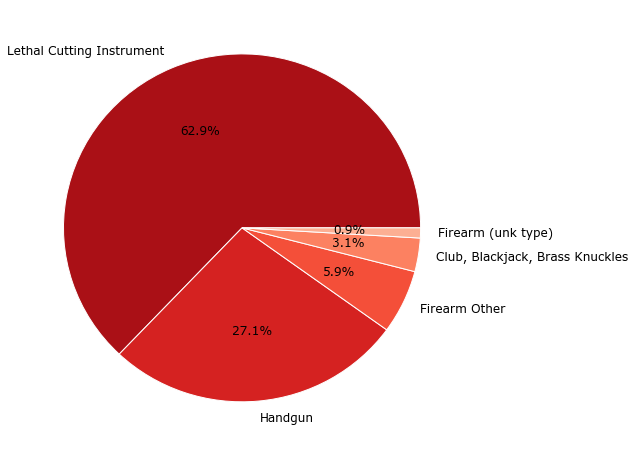

In [29]:
max_weapon_on_chart = 5
#chart config
sns.set_palette('Reds_r')
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

x_total_weapons = df_weapons_race[filter_Black].Weapon_Type.value_counts()[:max_weapon_on_chart]
y_total_weapons = df_weapons_race[filter_Black].Weapon_Type.value_counts().index[:max_weapon_on_chart]

graph_total_weapons = ax.pie(x=x_total_weapons, labels=y_total_weapons, autopct='%1.1f%%', textprops={'fontsize': 12})

for weapon in graph_total_weapons[0]:
    weapon.set_edgecolor('white')
    
plt.show()

### 2.6.3. White People Guns

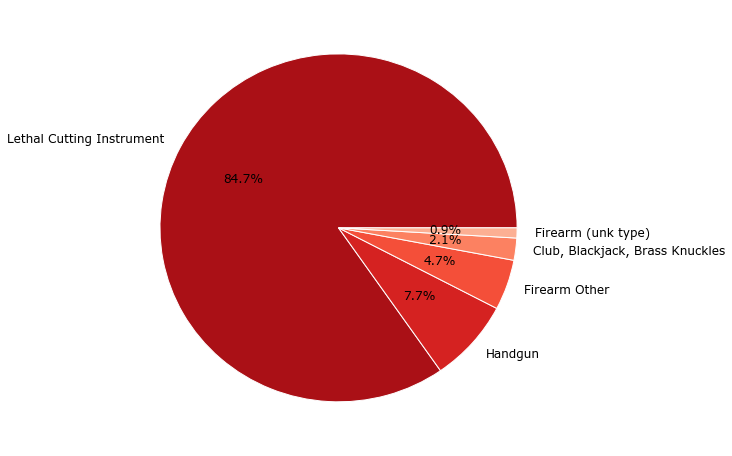

In [30]:
max_weapon_on_chart = 5
#chart config
sns.set_palette('Reds_r')
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

x_total_weapons = df_weapons_race[filter_White].Weapon_Type.value_counts()[:max_weapon_on_chart]
y_total_weapons = df_weapons_race[filter_White].Weapon_Type.value_counts().index[:max_weapon_on_chart]

graph_total_weapons = ax.pie(x=x_total_weapons, labels=y_total_weapons, autopct='%1.1f%%', textprops={'fontsize': 12})

for weapon in graph_total_weapons[0]:
    weapon.set_edgecolor('white')
    
plt.show()

In [31]:
filter_AIAN = df_weapons_race.Subject_Perceived_Race == 'American Indian / Alaskan Native'
filter_Asian = df_weapons_race.Subject_Perceived_Race == 'Asian'
filter_Hispanic = df_weapons_race.Subject_Perceived_Race == 'Hispanic'
filter_Other = df_weapons_race.Subject_Perceived_Race == 'Other'

### 2.6.4. American Indian / Alaskan Native People Guns

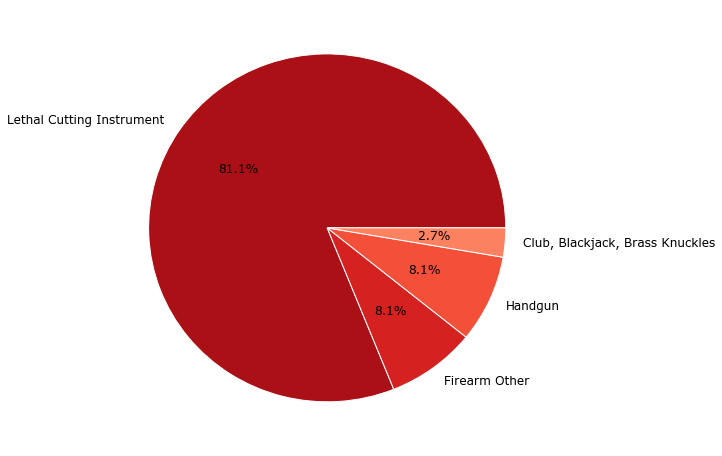

In [32]:
max_weapon_on_chart = 5
#chart config
sns.set_palette('Reds_r')
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

x_total_weapons = df_weapons_race[filter_AIAN].Weapon_Type.value_counts()[:max_weapon_on_chart]
y_total_weapons = df_weapons_race[filter_AIAN].Weapon_Type.value_counts().index[:max_weapon_on_chart]

graph_total_weapons = ax.pie(x=x_total_weapons, labels=y_total_weapons, autopct='%1.1f%%', textprops={'fontsize': 12})

for weapon in graph_total_weapons[0]:
    weapon.set_edgecolor('white')
    
plt.show()

### 2.6.5. Asias People Guns

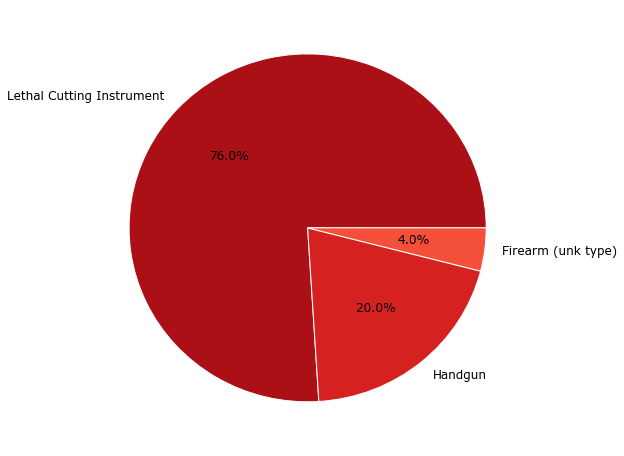

In [33]:
max_weapon_on_chart = 5
#chart config
sns.set_palette('Reds_r')
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

x_total_weapons = df_weapons_race[filter_Asian].Weapon_Type.value_counts()[:max_weapon_on_chart]
y_total_weapons = df_weapons_race[filter_Asian].Weapon_Type.value_counts().index[:max_weapon_on_chart]

graph_total_weapons = ax.pie(x=x_total_weapons, labels=y_total_weapons, autopct='%1.1f%%', textprops={'fontsize': 12})

for weapon in graph_total_weapons[0]:
    weapon.set_edgecolor('white')
    
plt.show()

### 2.6.6. Hispanic People Guns

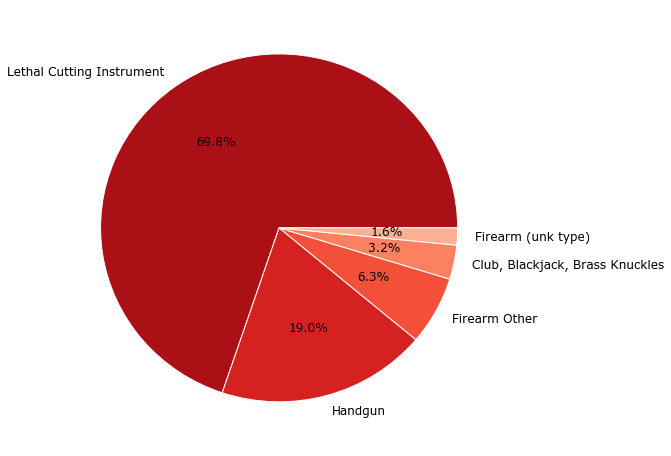

In [34]:
max_weapon_on_chart = 5
#chart config
sns.set_palette('Reds_r')
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

x_total_weapons = df_weapons_race[filter_Hispanic].Weapon_Type.value_counts()[:max_weapon_on_chart]
y_total_weapons = df_weapons_race[filter_Hispanic].Weapon_Type.value_counts().index[:max_weapon_on_chart]

graph_total_weapons = ax.pie(x=x_total_weapons, labels=y_total_weapons, autopct='%1.1f%%', textprops={'fontsize': 12})

for weapon in graph_total_weapons[0]:
    weapon.set_edgecolor('white')
    
plt.show()

### 2.6.7. Other People Guns

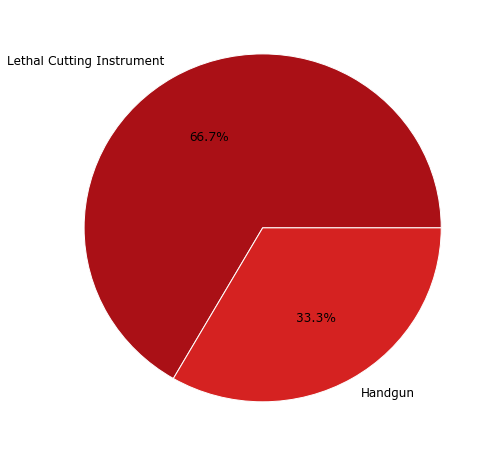

In [35]:
max_weapon_on_chart = 5
#chart config
sns.set_palette('Reds_r')
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

x_total_weapons = df_weapons_race[filter_Other].Weapon_Type.value_counts()[:max_weapon_on_chart]
y_total_weapons = df_weapons_race[filter_Other].Weapon_Type.value_counts().index[:max_weapon_on_chart]

graph_total_weapons = ax.pie(x=x_total_weapons, labels=y_total_weapons, autopct='%1.1f%%', textprops={'fontsize': 12})

for weapon in graph_total_weapons[0]:
    weapon.set_edgecolor('white')
    
plt.show()

## 2.7. What Officer Gender is the most usual?

In [36]:
df.Officer_Gender.unique().tolist()

['M', 'F']

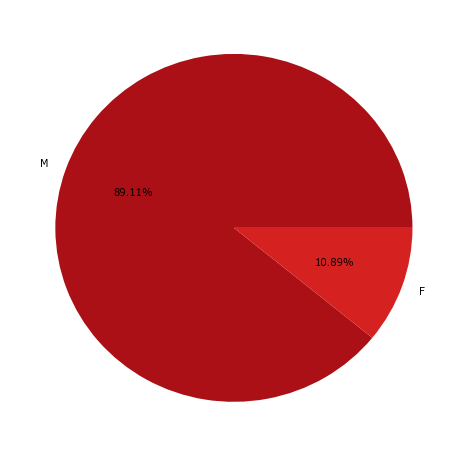

In [37]:
sns.set_palette('Reds_r')
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

x_officers_genders = df.Officer_Gender.value_counts()
y_officers_genders = df.Officer_Gender.value_counts().index

graph_officers_gender = ax.pie(x=x_officers_genders, labels=y_officers_genders, autopct='%1.2f%%')

plt.show()

### 2.7.1. Is there a relationship between Officer Gender and Weapons found?

In [72]:
filter_weapons = (df['Weapon_Type'] != '-') & (df['Weapon_Type'] != 'None') 

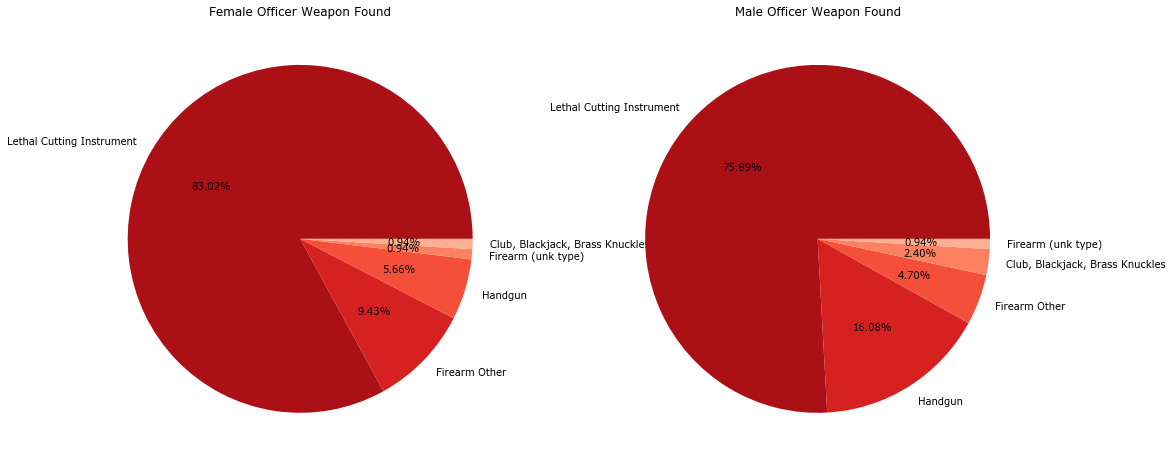

In [78]:
filter_female = df['Officer_Gender'] == 'F'
filter_male = df['Officer_Gender'] == 'M'

df_female_weapons = df[(filter_female) & (filter_weapons)]
df_male_weapons = df[(filter_male) & (filter_weapons)]

sns.set_palette('Reds_r')
fig, ax = plt.subplots(1,2)
fig.set_size_inches(17,8)

x_female_weapons = df_female_weapons.Weapon_Type.value_counts()[:5]
y_female_weapons = df_female_weapons.Weapon_Type.value_counts().index[:5]

x_male_weapons = df_male_weapons.Weapon_Type.value_counts()[:5]
y_male_weapons = df_male_weapons.Weapon_Type.value_counts().index[:5]

graph_female_weapons = ax[0].pie(x=x_female_weapons, labels=y_female_weapons, autopct='%1.2f%%')
graph_male_weapons = ax[1].pie(x=x_male_weapons, labels=y_male_weapons, autopct='%1.2f%%')

ax[0].set_title('Female Officer Weapon Found')
ax[1].set_title('Male Officer Weapon Found')

plt.show()

### 2.7.2. Is there a relationship between Officer Gender and Stop Resolution?

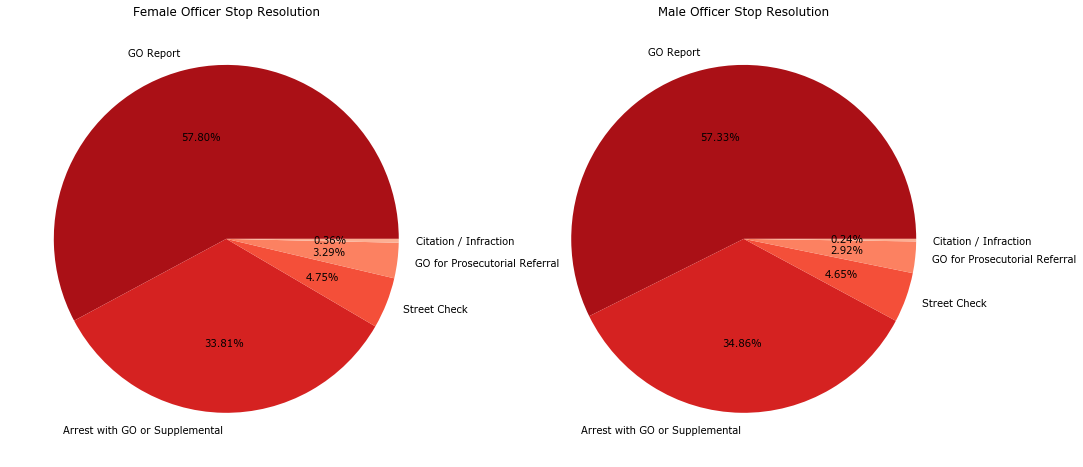

In [79]:
filter_male = df['Officer_Gender'] == 'M'
filter_stop_resolutions = df.Stop_Resolution != '-'

filter_female = df['Officer_Gender'] == 'F'

df_male_weapons = df[(filter_male) & (filter_stop_resolutions)]

df_female_weapons = df[(filter_female) & (filter_stop_resolutions)]

sns.set_palette('Reds_r')
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(17,8)

x_male_weapons = df_male_weapons.Stop_Resolution.value_counts()[:5]
y_male_weapons = df_male_weapons.Stop_Resolution.value_counts().index[:5]

x_female_weapons = df_female_weapons.Stop_Resolution.value_counts()[:5]
y_female_weapons = df_female_weapons.Stop_Resolution.value_counts().index[:5]

graph_female_weapons = ax[1].pie(x=x_female_weapons, labels=y_female_weapons, autopct='%1.2f%%')
graph_male_weapons = ax[0].pie(x=x_male_weapons, labels=y_male_weapons, autopct='%1.2f%%')

ax[0].set_title('Female Officer Stop Resolution')
ax[1].set_title('Male Officer Stop Resolution')

plt.show()

## 2.8. What is the reprentation of the first 5 squads?

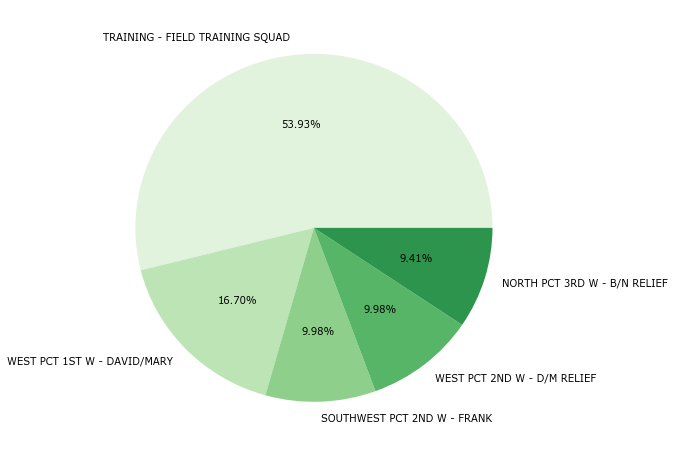

In [43]:
#chart config
sns.set_palette('Greens')
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

x_squads = df.Officer_Squad.value_counts()[:5]
labels_squads = df.Officer_Squad.value_counts().index[:5]

graph_squads = ax.pie(x=x_squads, labels=labels_squads, autopct='%1.2f%%')

plt.show()

### 2.8.1. Stop occurrences by Officer Squad

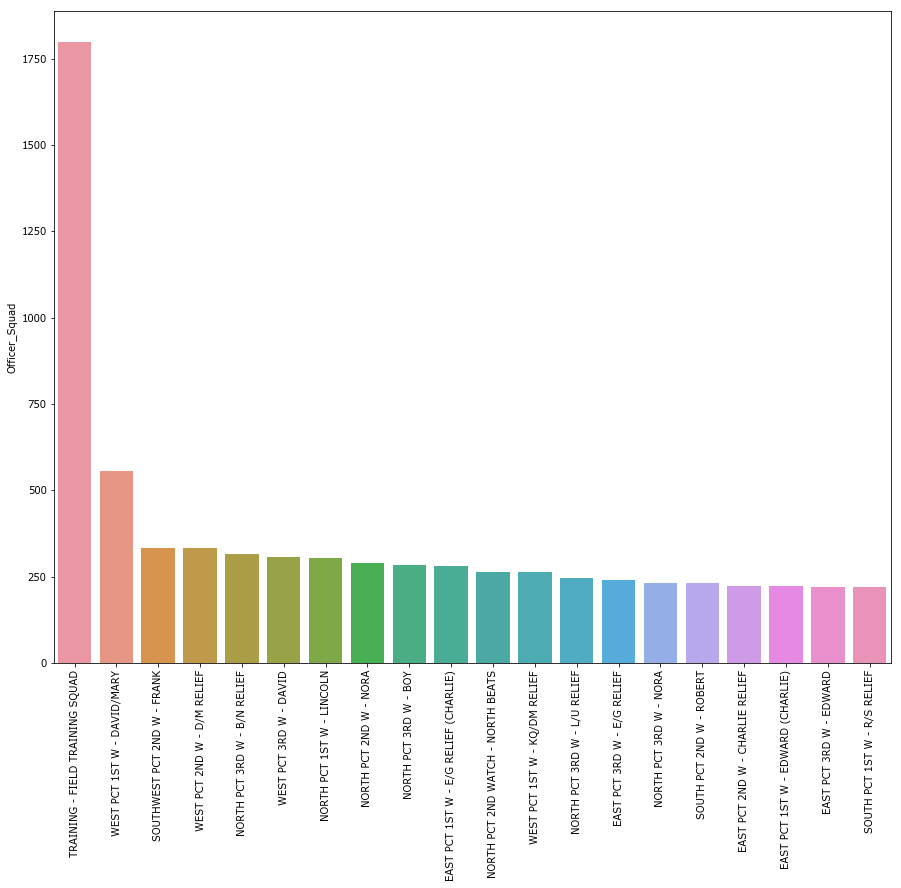

In [84]:
sns.set_palette('Blues')
fig, ax = plt.subplots()
fig.set_size_inches(15,12)

x_squads = df.Officer_Squad.value_counts().index[:20]
y_squads = df.Officer_Squad.value_counts()[:20]

graph_squads = sns.barplot(x=x_squads, y=y_squads, data=df )

for item in graph_squads.get_xticklabels():
    item.set_rotation(90)

plt.show()

### 2.8.2. Percentage of Stops by Seattle Precinct

In [45]:
filter_squad_precinct = (df.Officer_Squad.isin(df.Officer_Squad.value_counts()[:20].index.tolist())) & (df.Precinct != 'Unknown')

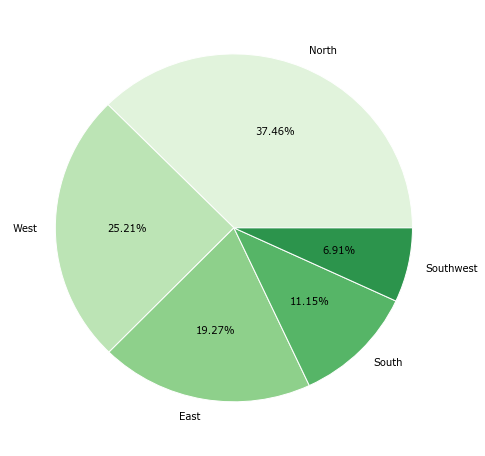

In [62]:
df_squads_precinct = df[filter_squad_precinct]

#chart config
sns.set_palette('Greens')
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

x_squads_precinct = df_squads_precinct['Precinct'].value_counts()
labels_squads_precinct = df_squads_precinct['Precinct'].value_counts().index

graph_squads_precinct = ax.pie(x=x_squads_precinct, labels=labels_squads_precinct, autopct='%1.2f%%')

for item in graph_squads_precinct[0]:
    item.set_edgecolor('white')

plt.show()

In [47]:
df.head(2)

,Subject_Age_Group,Terry_Stop_ID,Stop_Resolution,Weapon_Type,Officer_ID,Officer_YOB,Officer_Gender,Officer_Race,Subject_Perceived_Race,Subject_Perceived_Gender,...,Reported_Time,Initial_Call_Type,Final_Call_Type,Call_Type,Officer_Squad,Arrest_Flag,Frisk_Flag,Precinct,Sector,Beat
894,46 - 55,39041,GO Report,None,653,1961.0,M,White,Black,Male,...,21:49:00.0000000,ROBBERY - IP/JO (INCLUDES STRONG ARM),ROBBERY (INCLUDES STRONG ARM),911,NORTH PCT 2ND WATCH - B/N RELIEF,N,Y,North,N,N3
895,46 - 55,40227,Arrest with GO or Supplemental,None,1701,1978.0,M,White,White,Female,...,07:53:00.0000000,ASLT - WITH OR W/O WEAPONS (NO SHOOTINGS),"--ASSAULTS, OTHER","TELEPHONE OTHER, NOT 911",EAST PCT 1ST W - GEORGE (CHARLIE),Y,N,East,G,G1


### 2.8.3. Occurences by Sector

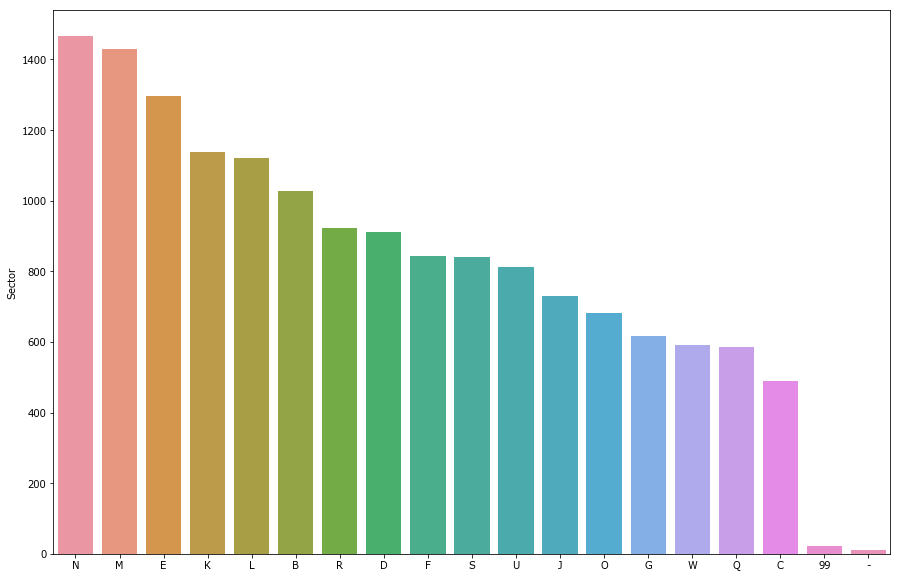

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)

x_sector = df.Sector.value_counts().index
y_sector = df.Sector.value_counts()

graph_sectors = sns.barplot(x=x_sector, y=y_sector, data=df)

# for label in graph_sectors.get_xticklabels():
#     label.set_rotation(45)

plt.show()

# Thank You!
Hello guys! This is my **first data analysis**, so feel free to report errors, reviews or if you think I did something wrong, please do let me know.

If you have new ideas, do let me know and then we can create more visualizations on this kernel.